In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
archivo2 = pd.read_csv(r'Call_Center_1999_DataSet_Cleaned.csv', delimiter=',', encoding='utf-8')
pd.DataFrame(archivo2)

,vru_linea,id_llamada,id_cliente,prioridad,tipo,fecha,entrada_vru,salida_vru,tiempo_vru,inicio_espera,fin_espera,tiempo_espera,resultado,inicio_servicio,fin_servicio,tiempo_servicio,agente,FechaInicio
0,AA0101,BD361,9664491,Alta Prioridad,Actividad Regular,1/1/1999,00:00:31,00:00:36,5,00:00:36,00:03:09,153,HANG,00:00:00,00:00:00,0,NO_SERVER,0
1,AA0101,C9083,No reconocido,Regular,Actividad Regular,1/1/1999,00:34:12,00:34:23,11,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,0
2,AA0101,8436F,27997683,Alta Prioridad,Actividad Regular,1/1/1999,06:55:20,06:55:26,6,06:55:26,06:55:43,17,AGENT,06:55:43,06:56:37,54,MICHAL,0
3,AA0101,0016A,No reconocido,Regular,Actividad Regular,1/1/1999,07:41:16,07:41:26,10,00:00:00,00:00:00,0,AGENT,07:41:25,07:44:53,208,BASCH,0
4,AA0101,70DA6,No reconocido,Regular,Actividad Regular,1/1/1999,08:03:14,08:03:24,10,00:00:00,00:00:00,0,AGENT,08:03:23,08:05:10,107,MICHAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438348,AA0216,1341E,No reconocido,Regular,Consulta por internet,31/12/1999,13:46:51,13:47:04,13,00:00:00,00:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
438349,AA0216,EDE31,No reconocido,Regular,Consulta por internet,31/12/1999,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,00:00:00,00:00:00,0,NO_SERVER,334
438350,AA0216,2D172,No reconocido,Regular,Consulta por internet,31/12/1999,17:10:51,17:11:12,21,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,334
438351,AA0216,82A6A,No reconocido,Regular,Consulta por internet,31/12/1999,18:30:19,18:30:54,35,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,334


C:\Users\Usuario\AppData\Local\Temp\ipykernel_26140\412769137.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=llamadas_por_vru_line.index, y=llamadas_por_vru_line.values, palette='viridis')


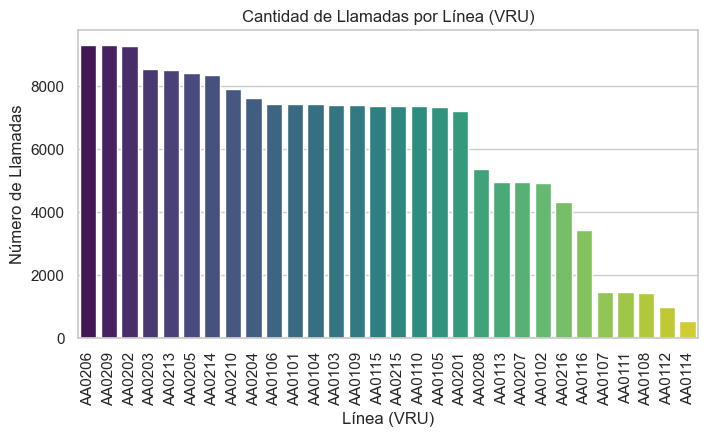

In [146]:
# Agrupar por la columna 'vru+line' para contar la cantidad de llamadas
llamadas_por_vru_line = archivo2['vru_linea'].value_counts()
plt.figure(figsize=(8, 4)) # Crear gráfico de barras
sns.barplot(x=llamadas_por_vru_line.index, y=llamadas_por_vru_line.values, palette='viridis')
plt.title('Cantidad de Llamadas por Línea (VRU)')
plt.xlabel('Línea (VRU)')
plt.ylabel('Número de Llamadas')
plt.xticks(rotation=90)
plt.show()

Total de clientes con servicio no provisto: 43205
Total de llamadas: 184756


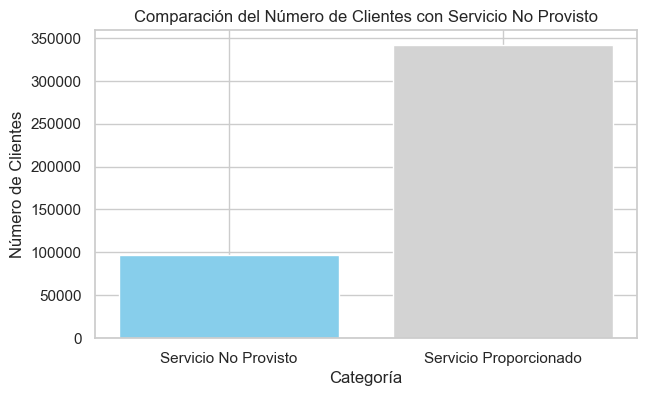

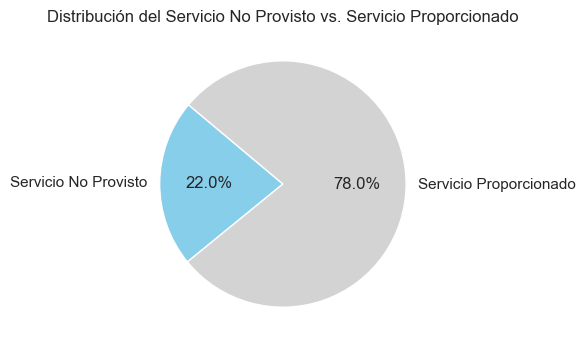

In [145]:
sin_servicio = archivo2[archivo2['agente'] == 'NO_SERVER']
total_sin_servicio = sin_servicio['id_llamada'].count()
total_llamadas = archivo2['id_llamada'].count()
print(f'Total de clientes con servicio no provisto: {total_sin_servicio}')
print(f'Total de llamadas: {total_llamadas}')

# 2. Gráfico de Barras del Número de Clientes con Servicio No Provisto (NO_SERVER)
categorias = ['Servicio No Provisto', 'Servicio Proporcionado']
valores = [96454, 438353 - 96454]
plt.figure(figsize=(7, 4))
plt.bar(categorias, valores, color=['skyblue', 'lightgray'])
plt.title('Comparación del Número de Clientes con Servicio No Provisto')
plt.xlabel('Categoría')
plt.ylabel('Número de Clientes')
plt.show()

# Distribución gráfico circular
labels = ['Servicio No Provisto', 'Servicio Proporcionado']
sizes = [96454, 438353 - 96454]
colors = ['skyblue', 'lightgray']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Servicio No Provisto vs. Servicio Proporcionado')
plt.show()

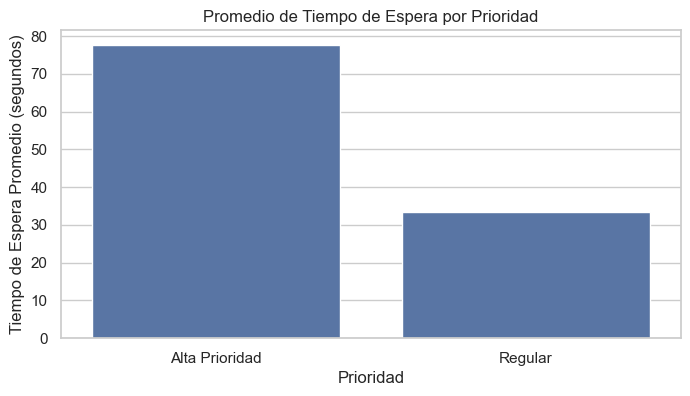

In [144]:
# Gráfico de Barras para el promedio de tiempo de espera por prioridad
plt.figure(figsize=(8, 4))
sns.barplot(x=promedio_tiempo_espera_prioridad.index, y=promedio_tiempo_espera_prioridad.values)
plt.title('Promedio de Tiempo de Espera por Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Tiempo de Espera Promedio (segundos)')
plt.show()

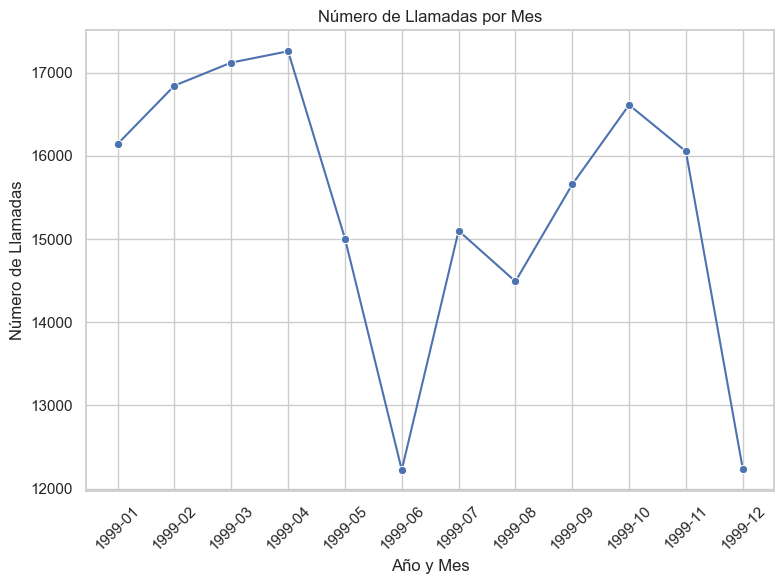

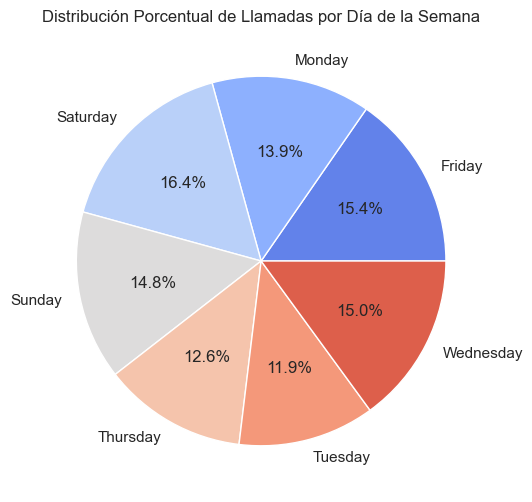

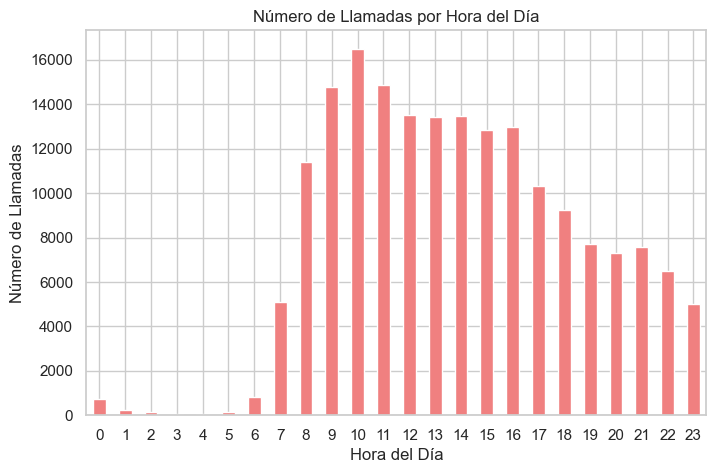

In [143]:
archivo2 = archivo2.dropna(subset=['fecha'])

archivo2['fecha'] = pd.to_datetime(archivo2['fecha'], errors='coerce') # Asegurar columna 'fecha' esté en formato de fecha

archivo2['año_mes'] = archivo2['fecha'].dt.to_period('M') # Extraer el año y mes de la fecha
llamadas_por_mes = archivo2.groupby('año_mes').size().reset_index(name='Número de Llamadas') # Agrupar por año y mes y contar el número de llamadas
llamadas_por_mes['año_mes'] = llamadas_por_mes['año_mes'].astype(str) # convertir a cadena para el gráfico
llamadas_por_mes['Número de Llamadas'] = pd.to_numeric(llamadas_por_mes['Número de Llamadas'], errors='coerce') # Asegurarse de que 'Número de Llamadas' es numérico

# gráfico
plt.figure(figsize=(8, 6))
sns.lineplot(data=llamadas_por_mes, x='año_mes', y='Número de Llamadas', marker='o', linestyle='-', color='b')
plt.title('Número de Llamadas por Mes')
plt.xlabel('Año y Mes')
plt.ylabel('Número de Llamadas')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar recortes
plt.show()

# Asegúrate de que la columna 'fecha' esté en formato de fecha
archivo2['fecha'] = pd.to_datetime(archivo2['fecha'], errors='coerce') 
llamadas_por_dia = archivo2['fecha'].dt.day_name().value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).sort_index() # Cantidad de llamadas por día de la semana
plt.figure(figsize=(8, 6)) # Crear el gráfico de pastel para llamadas por día de la semana
plt.pie(llamadas_por_dia, labels=llamadas_por_dia.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(llamadas_por_dia)))
plt.title('Distribución Porcentual de Llamadas por Día de la Semana')
plt.show()

llamadas_por_hora = archivo2['entrada_vru'].value_counts().sort_index() #  del día
plt.figure(figsize=(8, 5))
llamadas_por_hora.plot(kind='bar', color='lightcoral')
plt.title('Número de Llamadas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Llamadas')
plt.xticks(rotation=0)
plt.show()

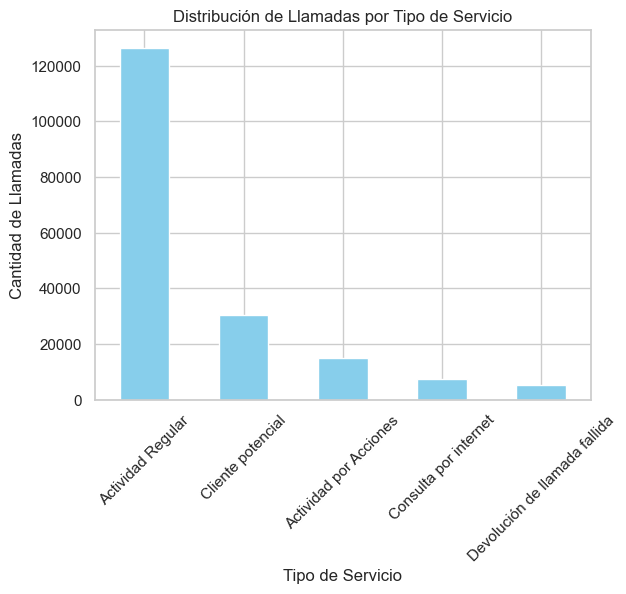

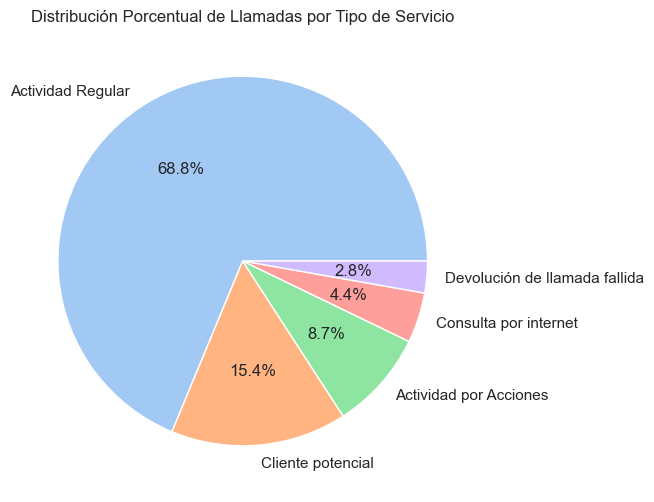

In [140]:
# Contar el volumen de llamadas por tipo de servicio
llamadas_por_tipo = archivo2['tipo'].value_counts()

llamadas_por_tipo.plot(kind='bar', color='skyblue', title='Distribución de Llamadas por Tipo de Servicio') # Graficar la distribución de llamadas por tipo de servicio
plt.xlabel('Tipo de Servicio')
plt.ylabel('Cantidad de Llamadas')
plt.xticks(rotation=45)  # Rotar etiquetas para mejorar la legibilidad
plt.show()

plt.figure(figsize=(6, 6)) # distribución porcentual
porcentaje_por_tipo.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), title='Distribución Porcentual de Llamadas por Tipo de Servicio')
plt.ylabel('')
plt.show()


   id_cliente       prioridad Tipo_Cliente
0     9664491  Alta Prioridad  Prioritario
2    27997683  Alta Prioridad  Prioritario
7    68062744  Alta Prioridad  Prioritario
9     1466671  Alta Prioridad  Prioritario
11   23949225  Alta Prioridad  Prioritario
12   59669259         Regular      Regular
13   49921232  Alta Prioridad  Prioritario
17   24290983  Alta Prioridad  Prioritario
20   50698984  Alta Prioridad  Prioritario
25   27347905         Regular      Regular


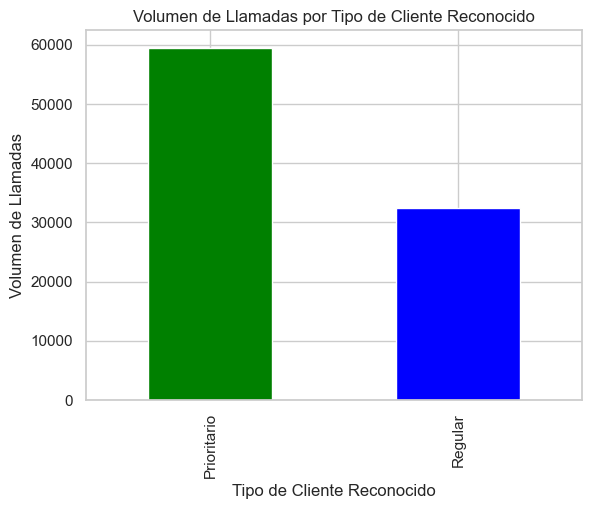

In [139]:
# Crear una columna para identificar si el cliente es reconocido o no
archivo2['Reconocido'] = archivo2['id_cliente'].apply(lambda x: 'No Reconocido' if x == 'No reconocido' else 'Reconocido')

archivo_reconocidos = archivo2[archivo2['Reconocido'] == 'Reconocido'].copy() # Filtrar

def clasificar_cliente(row):
    if row['prioridad'] in ['Regular', 'Alta Prioridad']:
        return 'Prioritario' if row['prioridad'] == 'Alta Prioridad' else 'Regular'
    else:
        return 'Desconocido'

archivo_reconocidos.loc[:, 'Tipo_Cliente'] = archivo_reconocidos.apply(clasificar_cliente, axis=1) #  Aplicar la función para clasificar

print(archivo_reconocidos[['id_cliente', 'prioridad', 'Tipo_Cliente']].head(10))

volumen_llamadas_reconocidos = archivo_reconocidos['Tipo_Cliente'].value_counts() # Contar el volumen de llamadas por tipo de cliente reconocido
volumen_llamadas_reconocidos.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title('Volumen de Llamadas por Tipo de Cliente Reconocido')
plt.xlabel('Tipo de Cliente Reconocido')
plt.ylabel('Volumen de Llamadas')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26140\2522855513.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tipo de Cliente', y='Cantidad', data=df_comparacion, palette='Set2')


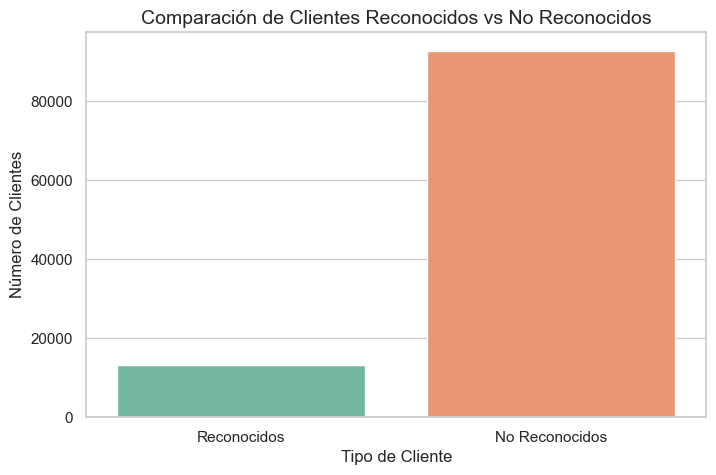

In [138]:
clientes_reconocidos = archivo2[archivo2['id_cliente'] != 'No reconocido']['id_cliente'].nunique() # Contar la cantidad de clientes reconocidos y no reconocidos
clientes_no_reconocidos = archivo2[archivo2['id_cliente'] == 'No reconocido']['id_cliente'].count()

data = {
    'Tipo de Cliente': ['Reconocidos', 'No Reconocidos'],
    'Cantidad': [clientes_reconocidos, clientes_no_reconocidos]
}

df_comparacion = pd.DataFrame(data)
sns.set(style="whitegrid") # Configuración del estilo de seaborn para una mejor visualización

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Tipo de Cliente', y='Cantidad', data=df_comparacion, palette='Set2')
plt.title('Comparación de Clientes Reconocidos vs No Reconocidos', fontsize=14)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)  # No se necesita rotación para este gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26140\2446966952.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_tiempo_espera_agente.index, y=promedio_tiempo_espera_agente.values, palette='viridis')


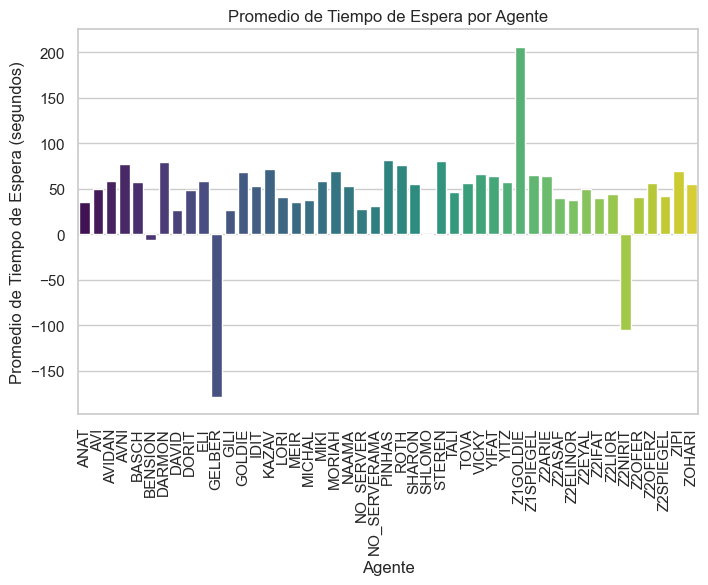

In [141]:
'''total_llamadas = archivo2['tipo'].count()
print('El total de llamadas recibidas es de: ', total_llamadas)'''
datos_filtrados = archivo2[archivo2['agente'] != 'no_server'] 
promedio_tiempo_espera_agente = datos_filtrados.groupby('agente')['tiempo_espera'].mean().round(2)
plt.figure(figsize=(8, 5))
sns.barplot(x=promedio_tiempo_espera_agente.index, y=promedio_tiempo_espera_agente.values, palette='viridis')
plt.title('Promedio de Tiempo de Espera por Agente')
plt.xlabel('Agente')
plt.ylabel('Promedio de Tiempo de Espera (segundos)')
plt.xticks(rotation=90)
plt.show()
